In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plotting epidemiological curves

In [2]:
df_sp = pd.read_csv('data/355030total_new.csv', delimiter = ';')
df_rj = pd.read_csv('data/330455total_new.csv', delimiter = ';')

In [40]:
df_sp

,Unnamed: 0,SIN_YEAR,SIN_WEEK,FIRST_DAY,CASES,IMPORTED,CASES_100
0,0,2000,1,2000-01-02,0,0,0.000000
1,1,2000,2,2000-01-09,0,0,0.000000
2,2,2000,3,2000-01-16,0,0,0.000000
3,3,2000,4,2000-01-23,0,0,0.000000
4,4,2000,5,2000-01-30,0,0,0.000000
...,...,...,...,...,...,...,...
1140,1140,2021,48,2021-11-28,16,0,0.139714
1141,1141,2021,49,2021-12-05,27,0,0.235767
1142,1142,2021,50,2021-12-12,40,0,0.349284
1143,1143,2021,51,2021-12-19,33,0,0.288159


In [3]:
df_sp['CASES_100'] =  (10**5)*df_sp['CASES']/11451999
df_rj['CASES_100'] = (10**5)*df_rj['CASES']/6211223

### Per week

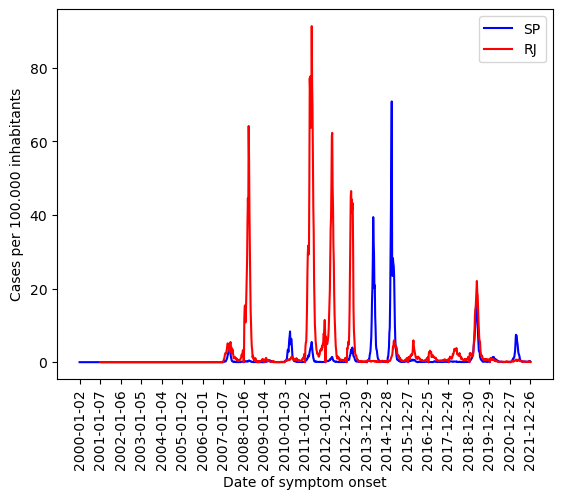

In [21]:
plt.plot(df_sp['FIRST_DAY'],df_sp['CASES_100'], color = 'blue', label = 'SP')
plt.plot(df_rj['FIRST_DAY'],df_rj['CASES_100'], color = 'red', label = 'RJ')
plt.xticks(df_sp['FIRST_DAY'][np.arange(0,1145,52)], rotation = 'vertical')
plt.legend()
plt.xlabel('Date of symptom onset')
plt.ylabel('Cases per 100.000 inhabitants')
plt.show()

### Per year

In [24]:
df_sp_gr = df_sp.groupby(['SIN_YEAR'])['CASES'].sum()
df_sp_gr = df_sp_gr.reset_index(name = 'CASES')
df_sp_gr['CASES_100'] = (10**5)*df_sp_gr['CASES']/(11451999)
df_rj_gr = df_rj.groupby(['SIN_YEAR'])['CASES'].sum()
df_rj_gr = df_rj_gr.reset_index(name = 'CASES')
df_rj_gr['CASES_100'] = (10**5)*df_rj_gr['CASES']/(6211223)

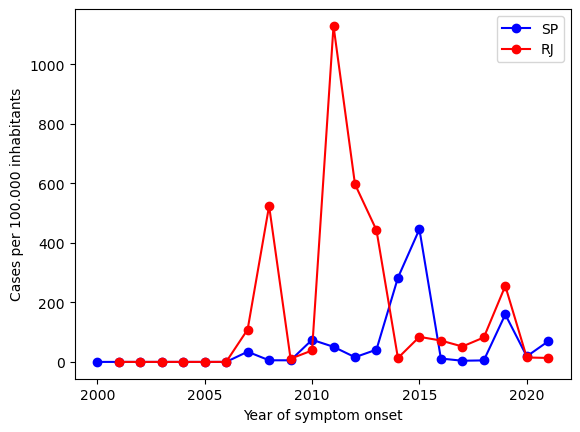

In [26]:
plt.plot(df_sp_gr['SIN_YEAR'],df_sp_gr['CASES_100'], '-o', color = 'blue', label = 'SP')
plt.plot(df_rj_gr['SIN_YEAR'],df_rj_gr['CASES_100'], '-o', color = 'red', label = 'RJ')
plt.legend()
plt.xlabel('Year of symptom onset')
plt.ylabel('Cases per 100.000 inhabitants')
plt.show()

## Plotting serotype dynamics

### Per week

In [86]:
df_sp_st = pd.read_csv('data/serotypes_SP.csv')
df_rj_st = pd.read_csv('data/serotypes_RJ.csv')

In [69]:
df_sp_st['SIN_YEAR'] = df_sp_st['SEM_PRI'].astype(str).str[0:4].astype(int) 
df_sp_st['SIN_WEEK'] = df_sp_st['SEM_PRI'].astype(str).str[4:].astype(int) 
df_rj_st['SIN_YEAR'] = df_rj_st['SEM_PRI'].astype(str).str[0:4].astype(int) 
df_rj_st['SIN_WEEK'] = df_rj_st['SEM_PRI'].astype(str).str[4:].astype(int)

In [70]:
df_sp['SIN_WEEK'] = df_sp['SIN_WEEK'].astype(int)
df_sp['SIN_YEAR'] = df_sp['SIN_YEAR'].astype(int)
df_rj['SIN_WEEK'] = df_rj['SIN_WEEK'].astype(int)
df_rj['SIN_YEAR'] = df_rj['SIN_YEAR'].astype(int)

In [71]:
df_sp_st = pd.merge(df_sp_st, df_sp, how = 'left', on = ['SIN_YEAR','SIN_WEEK'])
df_rj_st = df_rj_st.merge(df_rj, how = 'left', on = ['SIN_YEAR','SIN_WEEK'])

In [81]:
df_sp_st

,Unnamed: 0,SEM_PRI,0,1,2,3,4,CASES
0,0,200701,28.0,0.0,0.0,1.0,0.0,29.0
1,1,200702,44.0,0.0,0.0,3.0,0.0,47.0
2,2,200703,62.0,0.0,0.0,5.0,0.0,67.0
3,3,200704,93.0,0.0,0.0,0.0,0.0,93.0
4,4,200705,138.0,0.0,0.0,0.0,0.0,138.0
...,...,...,...,...,...,...,...,...
778,778,202148,17.0,0.0,0.0,0.0,0.0,17.0
779,779,202149,14.0,0.0,1.0,0.0,0.0,15.0
780,780,202150,4.0,0.0,1.0,0.0,0.0,5.0
781,781,202151,3.0,0.0,0.0,0.0,0.0,3.0


In [82]:
df_rj_st

,Unnamed: 0,SEM_PRI,0,1,2,3,4,CASES
0,0,200701,28.0,0.0,0.0,1.0,0.0,29.0
1,1,200702,44.0,0.0,0.0,3.0,0.0,47.0
2,2,200703,62.0,0.0,0.0,5.0,0.0,67.0
3,3,200704,93.0,0.0,0.0,0.0,0.0,93.0
4,4,200705,138.0,0.0,0.0,0.0,0.0,138.0
...,...,...,...,...,...,...,...,...
778,778,202148,17.0,0.0,0.0,0.0,0.0,17.0
779,779,202149,14.0,0.0,1.0,0.0,0.0,15.0
780,780,202150,4.0,0.0,1.0,0.0,0.0,5.0
781,781,202151,3.0,0.0,0.0,0.0,0.0,3.0


### Per year

## Plotting age dynamics